In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
import seaborn as sns

def plot_results(results, time, spikes, position):
    spike_ind, neuron_ind = np.nonzero(spikes)

    fig, axes = plt.subplots(4, 1, figsize=(18, 10), sharex=True, constrained_layout=True)
    axes[0].plot(time, position)
    axes[0].set_ylabel('Linear Distance')
    axes[0].set_title('Spikes')
    axes[1].scatter(time[spike_ind], neuron_ind + 1, color='black', s=2)
    axes[1].set_ylabel('Neuron Index')
    results.non_local_probability.plot(x='time', ax=axes[2], clip_on=False)
    axes[2].set_ylim((0, 1))
    axes[2].set_ylabel('Prob.')
    results.acausal_posterior.sum('state').plot(x='time', y='position', ax=axes[3], vmin=0.0, vmax=0.05)

    axes[-1].set_xlabel('Time');
    axes[-1].set_xlim((time[0], time[-1]))

    sns.despine()

In [4]:
from replay_identification.simulate import make_simulated_data

(is_replay, speed, position,
 power, spikes, time, multiunit) = make_simulated_data()

INFO:spectral_connectivity.transforms:Multitaper(sampling_frequency=1500, time_halfbandwidth_product=1,
           time_window_duration=0.02, time_window_step=0.0006666666666666666,
           detrend_type='constant', start_time=0, n_tapers=1)


In [ ]:
from replay_identification import SortedSpikesDetector

fit_args = dict(position=position, spikes=spikes)
predict_args = dict(position=position, spikes=spikes, time=time)
detector = SortedSpikesDetector(
    discrete_state_transition_type='make_from_user_specified_diagonal')

results, data_log_likelihood = detector.estimate_parameters(
    fit_args,
    predict_args,
    tolerance=1E-4,
    max_iter=20,
    estimate_state_transition=True,
    estimate_likelihood=False)
detector.plot_discrete_state_transition()

plt.figure()
plt.plot(data_log_likelihood)

plot_results(results, time, spikes, position)


INFO:replay_identification.detectors:Fitting discrete state transition...
INFO:replay_identification.detectors:Fitting continuous state transition...
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 0, likelihood: -856.2712826727075
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 1, likelihood: -850.7074525677538, change: 5.563830104953695
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 2, likelihood: -842.4410793988453, change: 8.266373168908444
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 3, likelihood: -838.1615118096355, change: 4.279567589209819
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 4, likelihood: -835.5679587489198, change: 2.593553060715749
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 5, likelihood: -833.772799002227, change: 1.7951597466927751
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 6, likelihood: -832.4028323704205, change: 1.3699666318065056
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 7, likelihood: -831.2844448381242, change: 1.1183875322963104
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 8, likelihood: -830.3378927813037, change: 0.9465520568204511
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 9, likelihood: -829.5194163520155, change: 0.8184764292882392
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 10, likelihood: -828.8116665047229, change: 0.7077498472925754
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 11, likelihood: -828.2036520500715, change: 0.6080144546514248
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 12, likelihood: -827.6910422316853, change: 0.5126098183861814
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 13, likelihood: -827.2650088526476, change: 0.42603337903767624
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 14, likelihood: -826.923338664602, change: 0.3416701880455548
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 15, likelihood: -826.6577476902188, change: 0.26559097438325807
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 16, likelihood: -826.4564309361645, change: 0.20131675405434635
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 17, likelihood: -826.3112479839267, change: 0.14518295223774658
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 18, likelihood: -826.2097345151807, change: 0.10151346874602041
INFO:replay_identification.detectors:Fitting place fields...
INFO:replay_identification.detectors:Estimating likelihood...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:replay_identification.detectors:Finding causal non-local probability and position...
INFO:replay_identification.detectors:Finding acausal non-local probability and position...
INFO:replay_identification.detectors:iteration 19, likelihood: -826.1404776271876, change: 0.06925688799310592


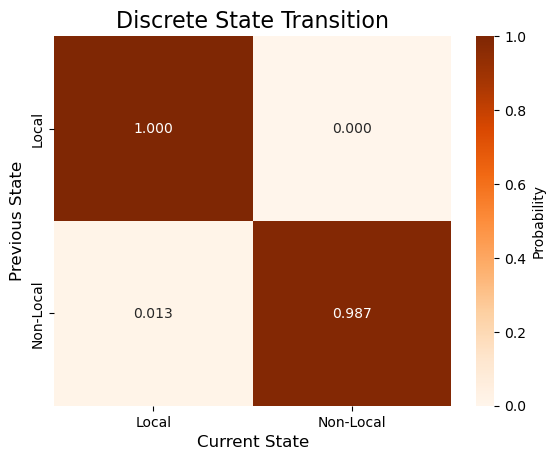

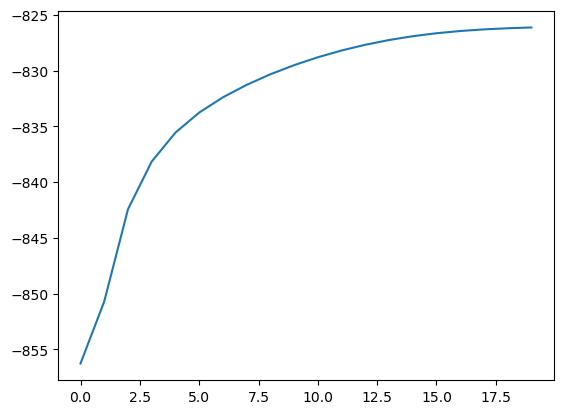

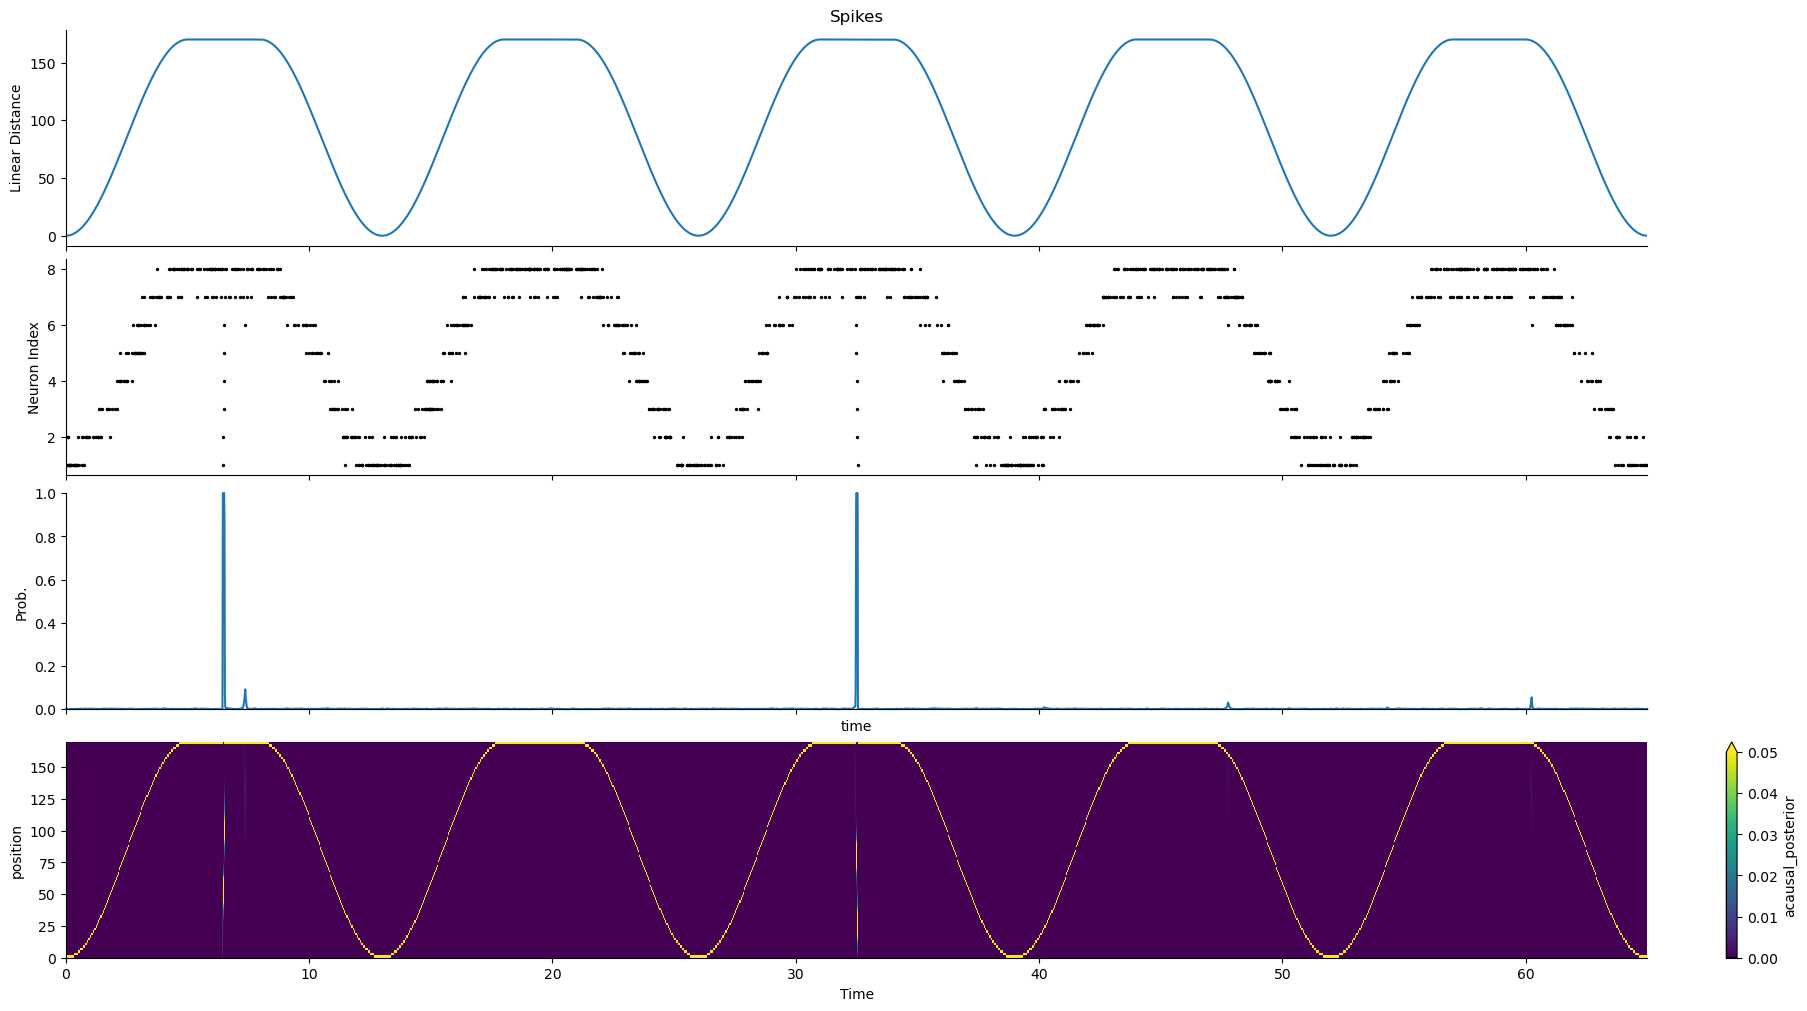

In [5]:
from replay_identification import SortedSpikesDetector

fit_args = dict(position=position, spikes=spikes)
predict_args = dict(position=position, spikes=spikes, time=time)
detector = SortedSpikesDetector(
    discrete_state_transition_type='make_from_user_specified_diagonal')

results, data_log_likelihood = detector.estimate_parameters(
    fit_args,
    predict_args,
    tolerance=1E-4,
    max_iter=20,
    estimate_state_transition=True,
    estimate_likelihood=True)
detector.plot_discrete_state_transition()

plt.figure()
plt.plot(data_log_likelihood)

plot_results(results, time, spikes, position)
